In [107]:
import numpy as np
import pandas as pd
# load mat file
import scipy

In [108]:
mat = scipy.io.loadmat('datasets/irmdata/uml.mat')
d = mat['Rs']
d.shape

(135, 135, 49)

In [109]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [110]:
import sys

sys.path.append("/Users/aleix11alcacer/Projects/archetypes")

In [111]:
from models import NAA, NSBM
from models import BiAA, DBiAA
import torch

In [112]:
data = torch.tensor(d).float().reshape(d.shape)

model = NSBM((16, 16, 21), d.shape, relations=[0, 0, 1], degree_correction=True,
             membership="soft", loss="bernoulli")

model.fit(data, n_epochs=2_000, learning_rate=0.05)

  0%|          | 0/2000 [00:00<?, ?it/s]

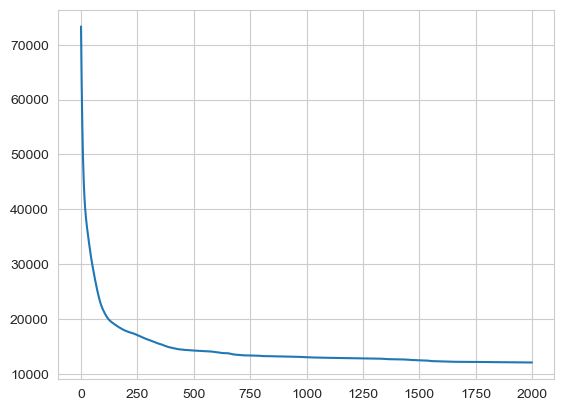

In [113]:
import matplotlib.pyplot as plt

plt.plot(model.losses)
plt.show()

In [114]:
from archetypes.visualization import heatmap
from archetypes.datasets import sort_by_archetype_similarity

In [115]:
alphas = [a.detach().numpy() for a in model.A]
estimated_archetypes = model.Z.detach().numpy()

_, info_s = sort_by_archetype_similarity(data[0, :, :], alphas[1:3], estimated_archetypes[0, :, :])

In [116]:
gnames = np.array([str(*g) for g in mat["gnames"][0]])[info_s["perms"][0]]
names = np.array([str(*n[0]) for n in mat["names"]])[info_s["perms"][0]]
labels = info_s["labels"][0]
scores = info_s["scores"][0]

df = pd.DataFrame({"gname": gnames, "name": names, "label": labels, "score": scores})

In [117]:
df_g = df.groupby("label")
for _, df_i in df_g:
    c = df_i.groupby("label").count()
    df_i_h = df_i.name[df_i.score > 0]
    # to latex
    print(f"{df_i_h.to_latex(index=False)}\\quad")



\begin{tabular}{l}
\toprule
                               name \\
\midrule
                  Regulation\_or\_Law \\
                Qualitative\_Concept \\
                           Activity \\
                   Machine\_Activity \\
               Intellectual\_Product \\
     Daily\_or\_Recreational\_Activity \\
Governmental\_or\_Regulatory\_Activity \\
                    Research\_Device \\
               Educational\_Activity \\
              Occupational\_Activity \\
                    Geographic\_Area \\
                Manufactured\_Object \\
                     Medical\_Device \\
                     Classification \\
                    Spatial\_Concept \\
                Nucleotide\_Sequence \\
              Carbohydrate\_Sequence \\
                 Functional\_Concept \\
                Amino\_Acid\_Sequence \\
                    Idea\_or\_Concept \\
               Drug\_Delivery\_Device \\
                        Body\_System \\
                           Language \\

In [118]:
true_label = df.gname.astype("category").cat.codes
pred_label = df.label.astype("category").cat.codes

from sklearn.metrics import adjusted_rand_score

adjusted_rand_score(true_label, pred_label)

0.5187659487007681

In [119]:
relnames = np.array([str(*g[0]) for g in mat["relnames"]])[info_s["perms"][1]]
labels = info_s["labels"][1]
scores = info_s["scores"][1]
df = pd.DataFrame({"relname": relnames, "label": labels, "score": scores})


In [120]:
for _, df_i in df.groupby("label"):
    c = df_i.groupby("relname").count()
    # to latex
    df_i_h = df_i.relname
    # print to latex, withouth the index
    print(f"{df_i_h.to_latex(index=False)}\n\n")

\begin{tabular}{l}
\toprule
              relname \\
\midrule
             contains \\
          adjacent\_to \\
          property\_of \\
            surrounds \\
developmental\_form\_of \\
              manages \\
         connected\_to \\
        interconnects \\
            traverses \\
         tributary\_of \\
          consists\_of \\
\bottomrule
\end{tabular}



\begin{tabular}{l}
\toprule
           relname \\
\midrule
          measures \\
          analyzes \\
assesses\_effect\_of \\
    measurement\_of \\
         practices \\
         branch\_of \\
\bottomrule
\end{tabular}



\begin{tabular}{l}
\toprule
    relname \\
\midrule
   exhibits \\
   performs \\
carries\_out \\
       uses \\
location\_of \\
\bottomrule
\end{tabular}



\begin{tabular}{l}
\toprule
                relname \\
\midrule
       manifestation\_of \\
         co-occurs\_with \\
               precedes \\
              degree\_of \\
conceptually\_related\_to \\
\bottomrule
\end{tabular}



\begin{tabul

c:\Users\aalcacer\Miniconda3\envs\archetypes\lib\site-packages\archetypes\visualization\heatmap.py:113: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.imshow(
c:\Users\aalcacer\Miniconda3\envs\archetypes\lib\site-packages\archetypes\visualization\heatmap.py:132: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.imshow(


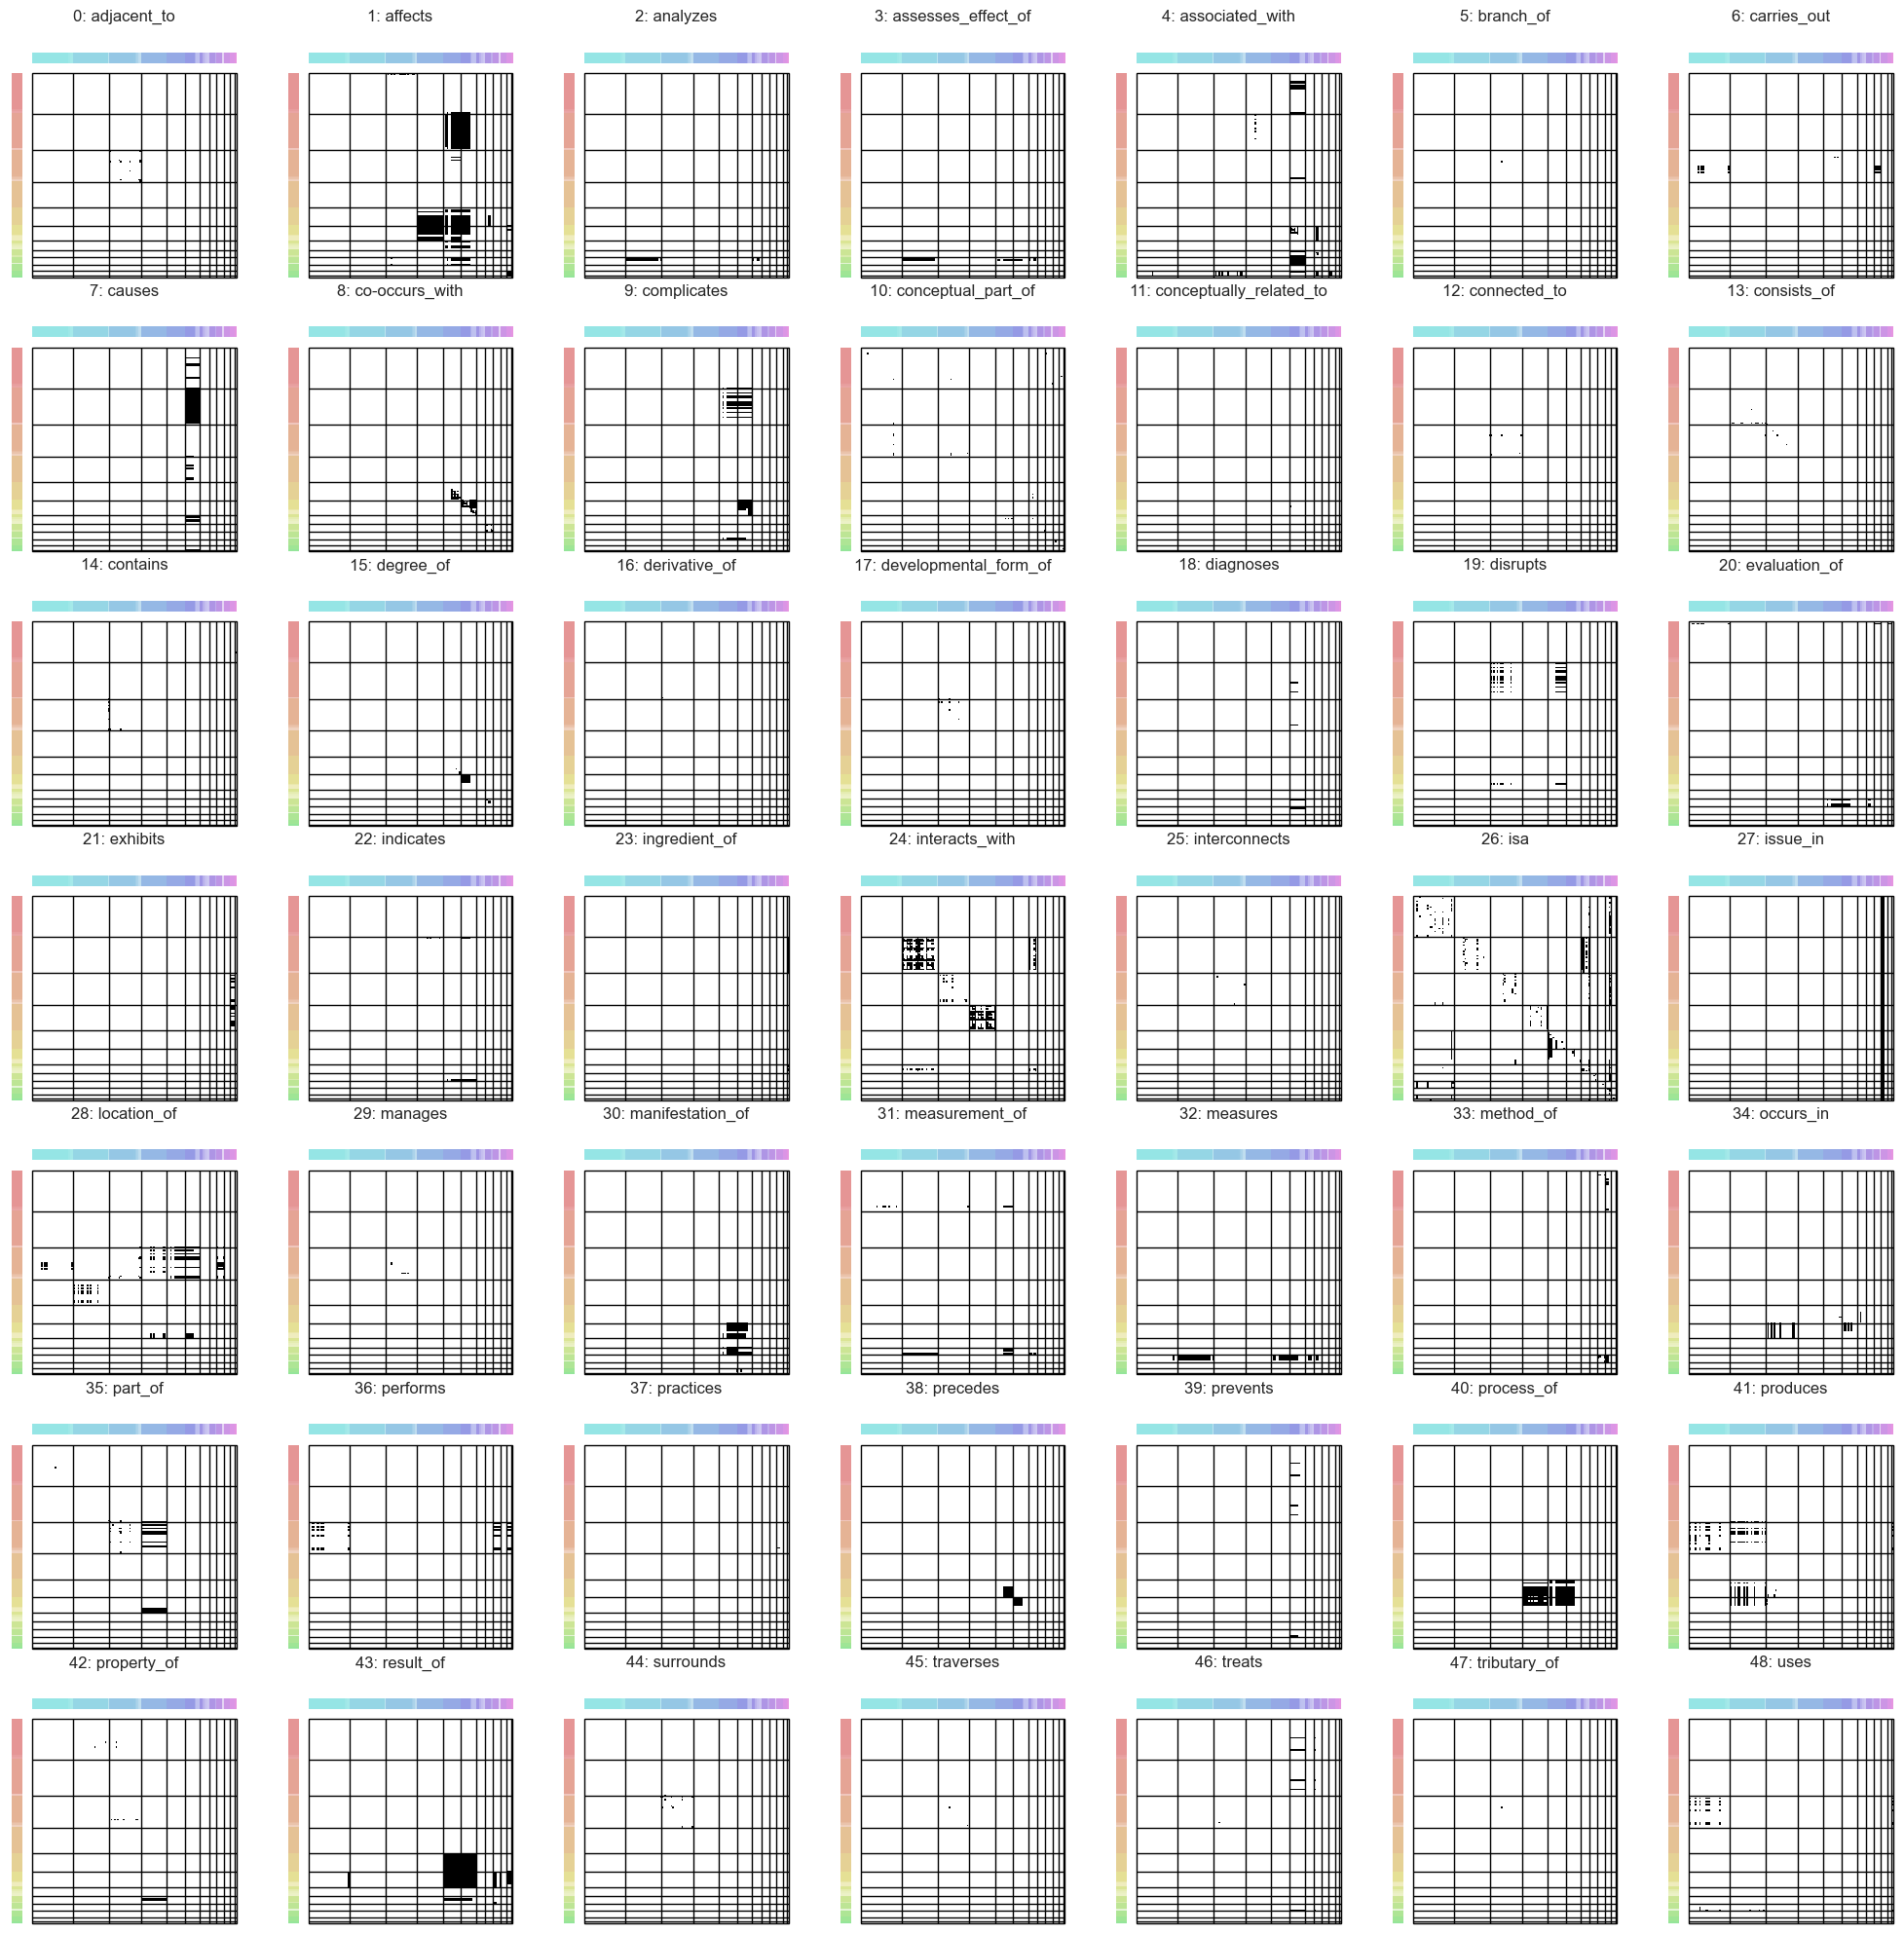

In [121]:
fig, axs = plt.subplots(7, 7, figsize=(25, 25))


for i, ax in enumerate(axs.flatten()):
    data_s, info_s = sort_by_archetype_similarity(data[:, :, i], alphas[:2], estimated_archetypes[:, :, 0])
    heatmap(data_s, info_s["labels"], info_s["n_archetypes"], info_s["scores"], ax=ax)
    ax.set_title(f"{i}: {mat['relnames'][i][0][0]}")

# fig.savefig("figures/irmdata/alyawarra/heatmap.png", dpi=300, bbox_inches='tight')

plt.show()

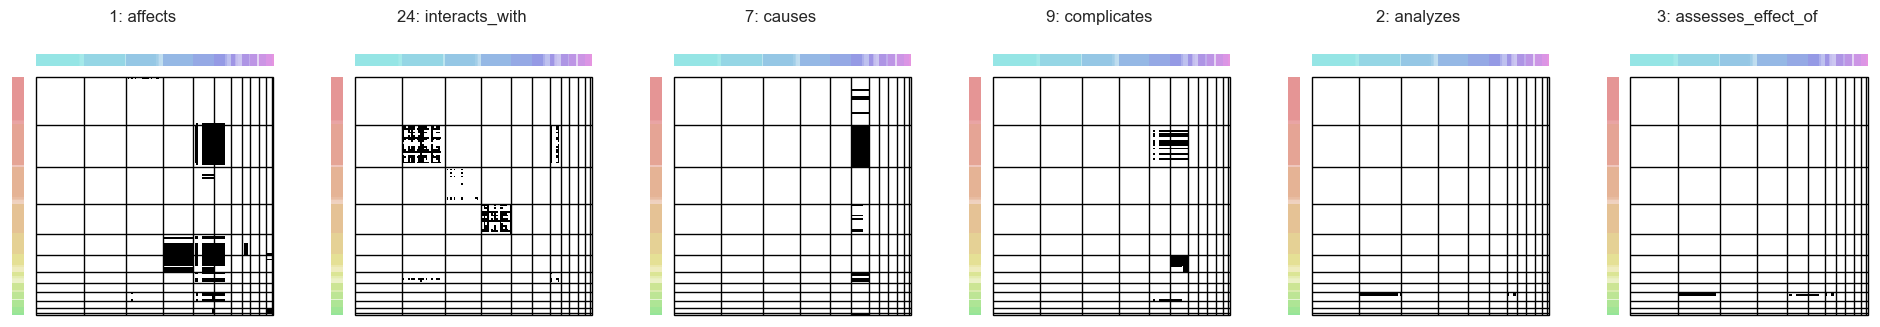

In [122]:
fig, axs = plt.subplots(1, 6, figsize=(24, 4))

rels = [1, 24, 7, 9, 2, 3]
for i, ax in enumerate(axs.flatten()):
    j = rels[i]
    data_s, info_s = sort_by_archetype_similarity(data[:, :, j], alphas[:2], estimated_archetypes[:, :, 0])
    heatmap(data_s, info_s["labels"], info_s["n_archetypes"], info_s["scores"], ax=ax)
    ax.set_title(f"{j}: {mat['relnames'][j][0][0]}")

# fig.savefig("figures/irmdata/uml/heatmap.png", dpi=300, bbox_inches='tight')

plt.show()

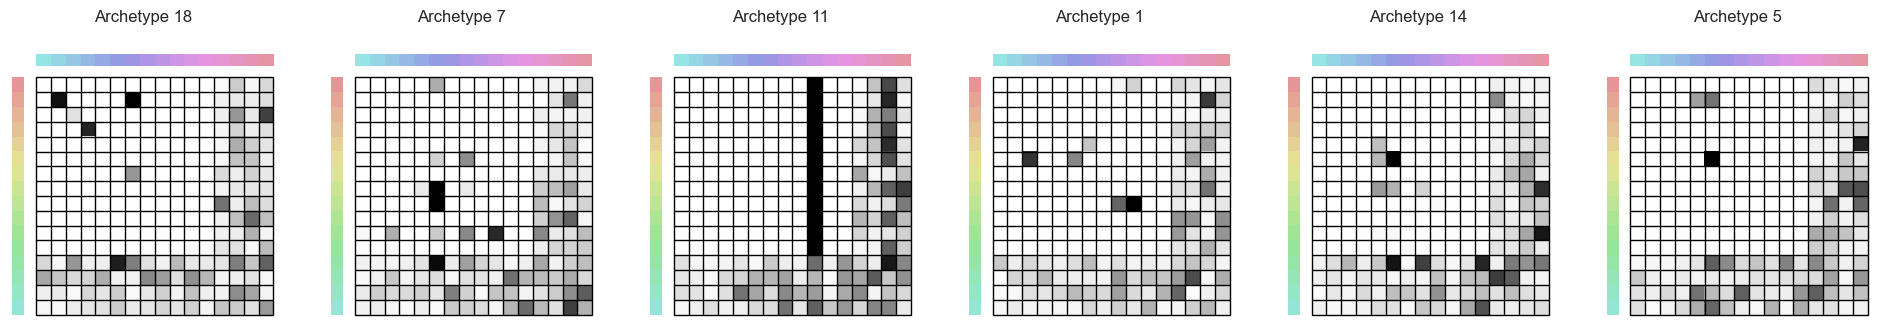

In [123]:
fig, axs = plt.subplots(1, 6, figsize=(24, 4))

rand_ind = np.random.choice(21, 6, replace=False)

for i, ax in enumerate(axs.flatten()):
    data_s, info_s = sort_by_archetype_similarity(data[:, :, 0], alphas[:2], estimated_archetypes[:, :, rand_ind[i]])
    heatmap(info_s["archetypes"], labels=[np.arange(na) for na in info_s["n_archetypes"]], ax=ax)
    ax.set_title(f"Archetype {rand_ind[i]}")
# fig.savefig("figures/irmdata/uml/heatmap.png", dpi=300, bbox_inches='tight')

plt.show()